# Machine Learning for Absolute Beginners

## Case Study: Gender Earnings Disparity 
### Guest Star: Cumulative Distribution Function

### 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-whitegrid')

### 1. Load and Prepare Data

In [2]:
elite = pd.read_csv('data/elite.csv').round(0)

In [3]:
elite.head(5)

,Institution,Women,Men
0,Harvard University,111300,167700
1,Massachusetts Institute of Technology,111200,163300
2,University of Pennsylvania,94200,160000
3,Stanford University,104500,140300
4,Yale University,97800,139300


In [4]:
elite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Institution  30 non-null     object
 1   Women        30 non-null     int64 
 2   Men          30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [5]:
df = pd.melt(elite, id_vars='Institution', value_vars=['Men', 'Women'])

In [6]:
df.sort_values(by='Institution').head(10)

,Institution,variable,value
53,Amherst College,Women,69000
23,Amherst College,Men,97000
39,Babson College,Women,91900
9,Babson College,Men,121700
27,Bates College,Men,95700
57,Bates College,Women,57800
46,Boston College,Women,79500
16,Boston College,Men,106100
48,Brown University,Women,73600
18,Brown University,Men,103400


In [9]:
df.columns =['Institution','Gender','Salary']


In [10]:
df.head()

,Institution,Gender,Salary
0,Harvard University,Men,167700
1,Massachusetts Institute of Technology,Men,163300
2,University of Pennsylvania,Men,160000
3,Stanford University,Men,140300
4,Yale University,Men,139300


In [11]:
df.Salary.mean()

99723.33333333333

In [12]:
grpd = df.groupby("Institution").mean()

Text(0, 0.5, 'Count')

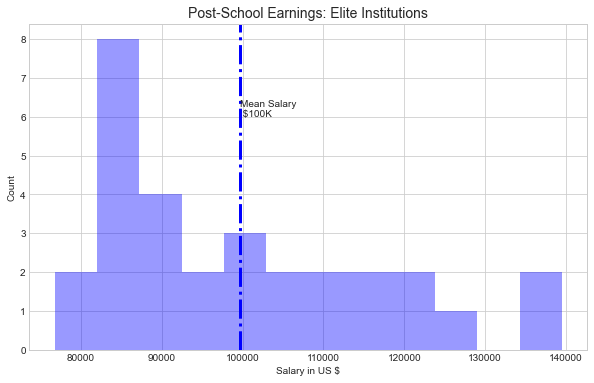

In [13]:
# draw histogram
plt.figure(figsize=(10,6))
sns.distplot(grpd.Salary, kde=False,color='Blue',bins=12)
plt.axvline(linewidth=3, linestyle = '-.', color='Blue', x=df.Salary.mean())
plt.annotate('Mean Salary \n $100K', xy=(df.Salary.mean(), 6))
plt.title("Post-School Earnings: Elite Institutions", fontsize='14')
plt.xlabel('Salary in US $')
plt.ylabel('Count')

Text(0.5, 0, 'Salary in US $')

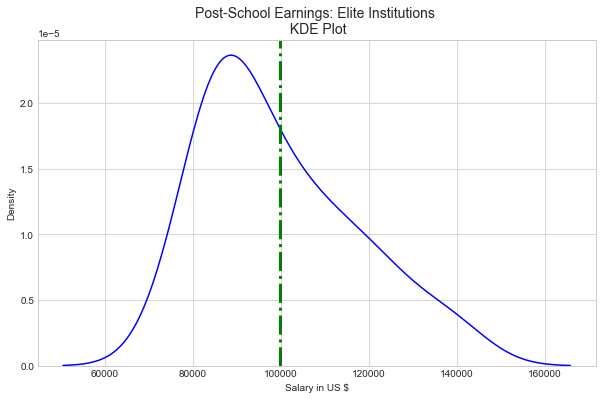

In [22]:
plt.figure(figsize=(10,6))
sns.kdeplot(grpd.Salary, color='Blue')
plt.axvline(linewidth=3, linestyle = '-.', color='g', x=df.Salary.mean())
#plt.annotate('Mean Salary \n $100K', xy=(100000, 1.5))
plt.title("Post-School Earnings: Elite Institutions \n KDE Plot", fontsize='14')
plt.xlabel('Salary in US $')
#plt.ylabel('Count')

In [23]:
elite.round(0)
print(elite['Men'].median())
print(elite['Women'].median())

109500.0
80000.0


Text(0.5, 0, 'Salary in US $')

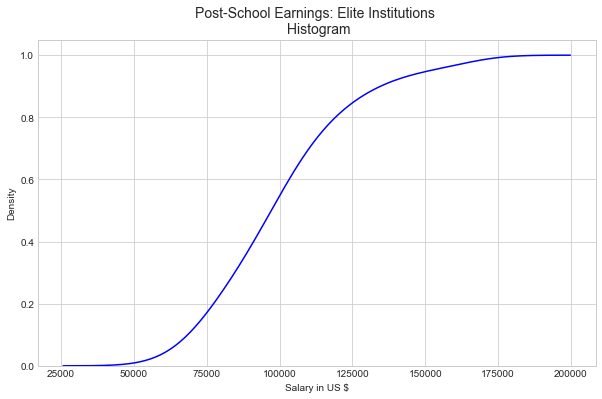

In [24]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.Salary, cumulative=True, color='Blue')
#plt.axvline(linewidth=3, linestyle = '-.', color='Blue', x=df.Salary.mean())
#plt.annotate('Mean Salary \n $100K', xy=(105000, 11))
plt.title("Post-School Earnings: Elite Institutions \n Histogram", fontsize='14')
plt.xlabel('Salary in US $')
#plt.ylabel('Count')

Text(0, 0.5, 'Count')

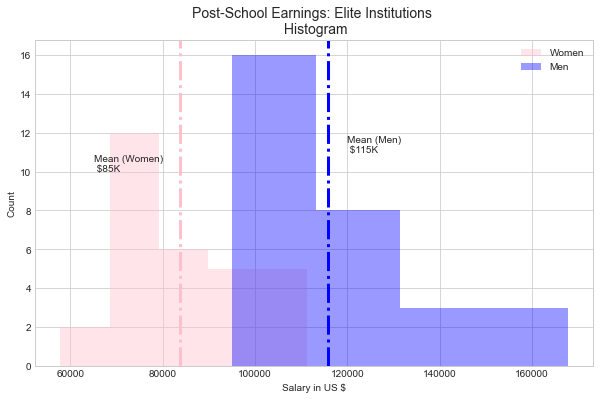

In [26]:
# draw histogram
plt.figure(figsize=(10,6))
sns.distplot(elite['Women'], kde=False,color='Pink',label='Women')
sns.distplot(elite['Men'], kde=False,color='Blue', label='Men')
plt.axvline(linewidth=3, linestyle = '-.', color='Blue', x=elite['Men'].mean())
plt.axvline(linewidth=3, linestyle = '-.', color='Pink', x=elite['Women'].mean())
plt.annotate('Mean (Women) \n $85K', xy=(65000, 10))
plt.annotate('Mean (Men) \n $115K', xy=(120000, 11))
plt.legend()
plt.title("Post-School Earnings: Elite Institutions \n Histogram", fontsize='14')
plt.xlabel('Salary in US $')
plt.ylabel('Count')
#plt.savefig('genderhistogram.png', dpi=1200)

Text(0, 0.5, 'Count')

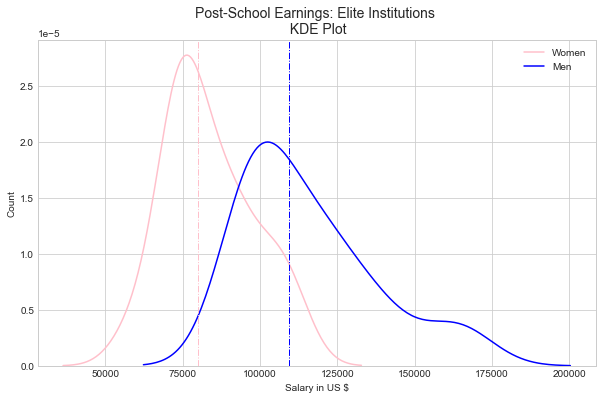

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(elite.Women, hist=False,color='Pink',label='Women')
sns.distplot(elite.Men, hist=False, color='Blue', label='Men')
plt.axvline(linewidth=1, linestyle = '-.', color='Blue', x=elite.Men.median())
plt.axvline(linewidth=1, linestyle = '-.', color='Pink', x=elite.Women.median())
plt.legend()
plt.title("Post-School Earnings: Elite Institutions \n KDE Plot", fontsize='14')
plt.xlabel('Salary in US $')
plt.ylabel('Count')
#plt.savefig('elitekde.png')

Text(0.5, 0, 'Salary in US $')

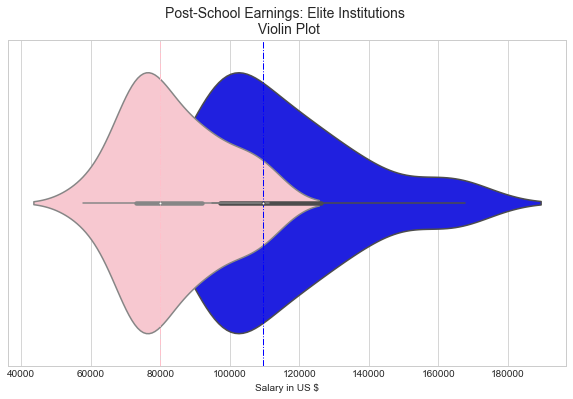

In [28]:
plt.figure(figsize=(10,6))
sns.violinplot(elite.Men, color='blue', label='Men')
sns.violinplot(elite.Women, color='pink', label='Women')
plt.title("Post-School Earnings: Elite Institutions \n Violin Plot", fontsize='14')
plt.axvline(linewidth=1, linestyle = '-.', color='Blue', x=elite.Men.median())
plt.axvline(linewidth=1, linestyle = '-.', color='Pink', x=elite.Women.median())
plt.xlabel('Salary in US $')
#plt.savefig('eliteviolin.png')

(0.0, 1.1)

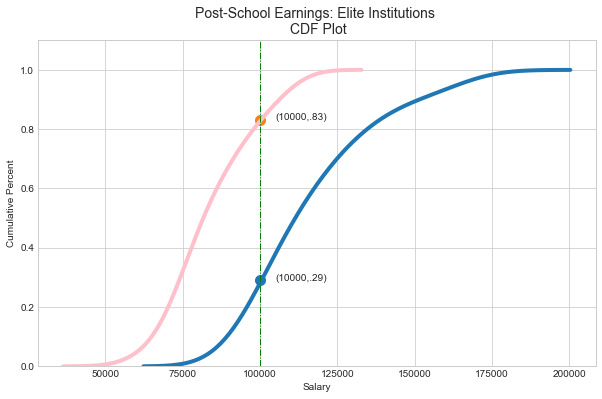

In [31]:
plt.figure(figsize=(10,6))
sns.kdeplot(elite.Men, cumulative=True, linewidth=4)
sns.kdeplot(elite.Women, cumulative=True, linewidth=4, color='pink')
plt.axvline(linewidth=1, linestyle = '-.', color='g', x=100000)
plt.scatter(100000,.29,s=100)
plt.scatter(100000,.83,s=100)
plt.annotate('(10000,.29)', xy=(105000, .29))
plt.annotate('(10000,.83)', xy=(105000, .83))
plt.title("Post-School Earnings: Elite Institutions \n CDF Plot", fontsize='14')
plt.xlabel("Salary")
plt.ylabel("Cumulative Percent")
plt.ylim(0,1.1)
